In [1]:
import cobra
model= cobra.io.load_matlab_model(
    "12934_2013_907_MOESM6_ESM")

In [2]:
model

Name,CL_Auto
Memory address,0x04df4710
Number of metabolites,698
Number of reactions,785
Number of groups,0
Objective expression,1.0*Cl_biomass_DSM_WT_46p666M1 - 1.0*Cl_biomass_DSM_WT_46p666M1_reverse_bcddb
Compartments,"c, e"


In [3]:
solution=model.optimize()
model.summary()

IN FLUXES           OUT FLUXES    OBJECTIVES
------------------  ------------  ----------------------
h2[e]   100         h2o[e]  55    Cl_biomass_D...  0.189
co2[e]   48.6       h[e]    21.3
nh4[e]    1.43      ac[e]   20.2
pi[e]     0.218
k[e]      0.036
so4[e]    0.0356
fe2[e]    0.00261
mg2[e]    0.0016
ca2[e]    0.000961
cl[e]     0.000961
fol[e]    0.000168
cu2[e]    0.000131
mn2[e]    0.000128


In [4]:
import re

def buscarMetabolito(nombreMetabolite):
    metabolites=[]
    for metabolite in model.metabolites:
        if re.match(nombreMetabolite,metabolite.name,re.IGNORECASE):# and re.match("_e",metabolite.name): 
            metabolites.append(metabolite)
    if len(metabolites)==0:
        print "Not found metabolite"
        return None
    else: #print "2 lets find the reactions associated with the name"
        for metabolite in metabolites:
            print "=================================="
            print metabolite.name, metabolite.id
            print "=================================="
            for reaction in model.metabolites.get_by_id(metabolite.id).reactions:
                print reaction
result=buscarMetabolito("something")

Not found metabolite


In [5]:
fru = model.reactions.get_by_id("EX_fru(e)")
print fru
print fru.reaction
print fru.name


print(fru.lower_bound, "< fru <", fru.upper_bound)

print"======================================================="

h2 = model.reactions.get_by_id("EX_h2(e)")
print h2
print h2.reaction
print h2.name


print(h2.lower_bound, "< h2 <", h2.upper_bound)

print"======================================================="

co2 = model.reactions.get_by_id("EX_co2(e)")
print co2
print co2.reaction
print co2.name


print(co2.lower_bound, "< co2 <", co2.upper_bound)


#para hacer autotrofica este modelo eliminaron o disminuieron a 0 la reaccion original EX_fru_e, crearon una muy parecido con un nuevo nombre
#no estoy seguro si primero aumentaron los rango de CO2 y H2 despues atacaron al modelo o alreves

EX_fru(e): fru[e] --> 
fru[e] --> 
D-Fructose exchange
(0.0, '< fru <', 1000.0)
EX_h2(e): h2[e] <=> 
h2[e] <=> 
H2 exchange
(-100.0, '< h2 <', 1000.0)
EX_co2(e): co2[e] <=> 
co2[e] <=> 
CO2 exchange
(-50.0, '< co2 <', 1000.0)


In [6]:
print solution
print solution.status 
print solution.objective_value  

<Solution 0.189 at 0x14ad64a8>
optimal
0.188561615722


In [7]:
%matplotlib inline
from cobra.flux_analysis import production_envelope
prod_env = production_envelope(model, ["EX_co2(e)", "EX_h2(e)"])
prod_env.head(15)

,carbon_source,carbon_yield_maximum,carbon_yield_minimum,flux_maximum,flux_minimum,mass_yield_maximum,mass_yield_minimum,EX_co2(e),EX_h2(e)
0,"EX_btn(e), EX_thm(e), EX_fol(e), EX_ribflv(e),...",1.603825,0.0,0.157355,0.0,NaN,NaN,-50.0,-100.000000
1,"EX_btn(e), EX_thm(e), EX_fol(e), EX_ribflv(e),...",0.928564,0.0,0.091100,0.0,NaN,NaN,-50.0,-94.863158
2,"EX_btn(e), EX_thm(e), EX_fol(e), EX_ribflv(e),...",0.253254,0.0,0.024846,0.0,NaN,NaN,-50.0,-89.726316
3,"EX_btn(e), EX_thm(e), EX_fol(e), EX_ribflv(e),...",NaN,NaN,NaN,NaN,NaN,NaN,-50.0,-84.589474
4,"EX_btn(e), EX_thm(e), EX_fol(e), EX_ribflv(e),...",NaN,NaN,NaN,NaN,NaN,NaN,-50.0,-79.452632
5,"EX_btn(e), EX_thm(e), EX_fol(e), EX_ribflv(e),...",NaN,NaN,NaN,NaN,NaN,NaN,-50.0,-74.315789
6,"EX_btn(e), EX_thm(e), EX_fol(e), EX_ribflv(e),...",NaN,NaN,NaN,NaN,NaN,NaN,-50.0,-69.178947
7,"EX_btn(e), EX_thm(e), EX_fol(e), EX_ribflv(e),...",NaN,NaN,NaN,NaN,NaN,NaN,-50.0,-64.042105
8,"EX_btn(e), EX_thm(e), EX_fol(e), EX_ribflv(e),...",NaN,NaN,NaN,NaN,NaN,NaN,-50.0,-58.905263
9,"EX_btn(e), EX_thm(e), EX_fol(e), EX_ribflv(e),...",NaN,NaN,NaN,NaN,NaN,NaN,-50.0,-53.768421


In [8]:
prod_env = production_envelope( model, ["EX_h2(e)"],  carbon_sources="EX_co2(e)")
prod_env.head()

,carbon_source,carbon_yield_maximum,carbon_yield_minimum,flux_maximum,flux_minimum,mass_yield_maximum,mass_yield_minimum,EX_h2(e)
0,EX_co2(e),1.976717,2.487820e-15,0.188562,0.0,NaN,NaN,-100.000000
1,EX_co2(e),1.974011,3.427075e-15,0.178637,0.0,NaN,NaN,-94.863158
2,EX_co2(e),1.970994,1.537445e-15,0.168713,0.0,NaN,NaN,-89.726316
3,EX_co2(e),1.967611,4.962234e-17,0.158789,0.0,NaN,NaN,-84.589474
4,EX_co2(e),1.963792,1.962796e-16,0.148864,0.0,NaN,NaN,-79.452632


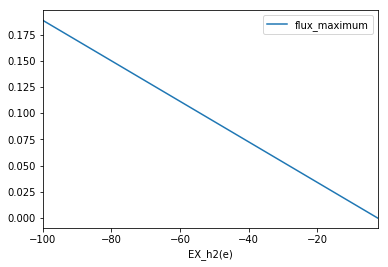

In [9]:

prod_env.plot( kind='line', x='EX_h2(e)', y='flux_maximum')

cobra\flux_analysis\phenotype_phase_plane.py:211 RuntimeWarning: divide by zero encountered in double_scalars


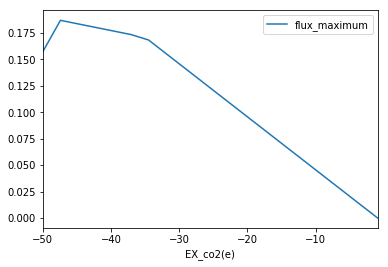

In [10]:
prod_env = production_envelope( model, ["EX_co2(e)"],  carbon_sources="EX_h2(e)")
prod_env.head() 
prod_env.plot( kind='line', x="EX_co2(e)", y='flux_maximum')

In [11]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

from time import time

import cobra.test
from cobra.flux_analysis import calculate_phenotype_phase_plane


ImportError: cannot import name calculate_phenotype_phase_plane

In [1]:
import matplotlib
print(matplotlib.__version__)

2.2.4
